In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [24]:
# Importing the training set
dataset_train = pd.read_csv('janata.csv')
training_set = dataset_train.iloc[:, 4:5].values


In [25]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [63]:
### Creating a data structure with 60 timesteps and 1 output
timestamp = 6

In [64]:
X_train = []
y_train = []
for i in range(timestamp,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
# Part 2 - Building the RNN

In [75]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
5149/5149 [==============================] - 10s 2ms/step - loss: 0.0063
Epoch 2/40
5149/5149 [==============================] - 5s 905us/step - loss: 0.0013
Epoch 3/40
5149/5149 [==============================] - 5s 908us/step - loss: 0.0011
Epoch 4/40
5149/5149 [==============================] - 5s 902us/step - loss: 0.0011
Epoch 5/40
5149/5149 [==============================] - 5s 909us/step - loss: 0.0011
Epoch 6/40
5149/5149 [==============================] - 5s 1ms/step - loss: 0.0011
Epoch 7/40
5149/5149 [==============================] - 5s 1ms/step - loss: 0.0010
Epoch 8/40
5149/5149 [==============================] - 5s 1ms/step - loss: 8.9709e-04
Epoch 9/40
5149/5149 [==============================] - 5s 1ms/step - loss: 9.6217e-04
Epoch 10/40
5149/5149 [==============================] - 5s 1ms/step - loss: 8.2934e-04
Epoch 11/40
5149/5149 [==============================] - 6s 1ms/step - loss: 8.6835e-04
Epoch 12/40
5149/5149 [==============================] - 5s 

In [76]:
dataset_test = pd.read_csv('test.csv')

In [77]:
real_stock_price = dataset_test.iloc[:, 4:5].values
dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)

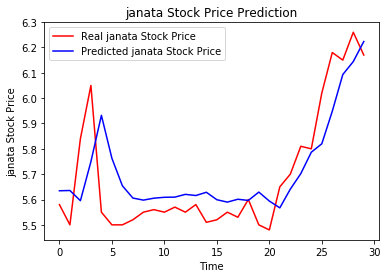

In [79]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestamp:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(timestamp, timestamp + 30):
    X_test.append(inputs[i-timestamp:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real janata Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted janata Stock Price')
plt.title('janata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('janata Stock Price')
plt.legend()
plt.show()